In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib

%matplotlib inline

# Problem Statement

The "Adidas Merchandise" management team wants to analyze the post-pandemic sales within the region and get an insight into the maximum and minimum source of revenue generation.
We are tasked to dig deeper into the shared dataset and present with some insightful findings.


###### Before digging deep into the analysis, we first look into the dataset as if any missing data/columns or the data types are correctly defined and all sort of explorations.

In [2]:
#Importing Dataset

df = pd.read_excel('Adidas US Sales Datasets_Edited.xlsx')
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Gender,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,Men,Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,Men,Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,Women,Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,Women,Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,Men,Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [3]:
df.shape

(9648, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Gender            9648 non-null   object        
 8   Product Category  9648 non-null   object        
 9   Price per Unit    9648 non-null   float64       
 10  Units Sold        9648 non-null   int64         
 11  Total Sales       9648 non-null   float64       
 12  Operating Profit  9648 non-null   float64       
 13  Operating Margin  9648 non-null   float64       
 14  Sales Method      9648 n

In [5]:
df.describe() #the brief summarization of the values

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [6]:
df.isnull().sum()  #checking for the missing values

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Gender              0
Product Category    0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

## Some basic calculations

Before going further with the analysis, we need to add some further calculation to forecast the trend.

In [7]:
df['Net Profit Margin']= df['Total Sales']-df['Operating Profit']
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Gender,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Net Profit Margin
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,Men,Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,300000.0
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,Men,Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,350000.0
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,Women,Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,260000.0
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,Women,Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,248625.0
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,Men,Apparel,60.0,900,540000.0,162000.0,0.30,In-store,378000.0


In [8]:
df['Selling Years']= df['Invoice Date'].dt.year
#df['Selling Years']=df['Selling Years'].map({2020:'2020', 2021:'2021'})
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Gender,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Net Profit Margin,Selling Years
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,Men,Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,300000.0,2020
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,Men,Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,350000.0,2020
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,Women,Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,260000.0,2020
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,Women,Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,248625.0,2020
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,Men,Apparel,60.0,900,540000.0,162000.0,0.30,In-store,378000.0,2020


In [9]:
df['Day of The Week']= df['Invoice Date'].dt.dayofweek
df.groupby(['Invoice Date','Day of The Week']).size()
#0 is Monday and that's how we need to map 
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Gender,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Net Profit Margin,Selling Years,Day of The Week
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,Men,Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,300000.0,2020,2
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,Men,Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,350000.0,2020,3
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,Women,Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,260000.0,2020,4
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,Women,Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,248625.0,2020,5
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,Men,Apparel,60.0,900,540000.0,162000.0,0.30,In-store,378000.0,2020,6


In [10]:
df['Day of The Week']=df['Day of The Week'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',
                                                 4:'Friday',5:'Saturday',6:'Sunday'})
df['Day Type']=df['Day of The Week'].map({'Monday':'Weekday','Tuesday':'Weekday','Wednesday':'Weekday',
                                          'Thursday':'Weekday','Friday':'Weekday','Saturday':'Weekend','Sunday':'Weekend'})
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Gender,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Net Profit Margin,Selling Years,Day of The Week,Day Type
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,Men,Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,300000.0,2020,Wednesday,Weekday
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,Men,Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,350000.0,2020,Thursday,Weekday
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,Women,Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,260000.0,2020,Friday,Weekday
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,Women,Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,248625.0,2020,Saturday,Weekend
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,Men,Apparel,60.0,900,540000.0,162000.0,0.30,In-store,378000.0,2020,Sunday,Weekend


As we are set for further analysis we can go with plotting some graphs that might be needed to provide some insights.

# Plotting and Analysis

In [11]:
matplotlib.rcParams['figure.figsize']=(18,6)
print("Total Sale Generated: {}".format(df['Total Sales'].sum()))
#Here we set the default plot figure size parameters

Total Sale Generated: 899902125.0


Text(0, 0.5, 'Sales in $')

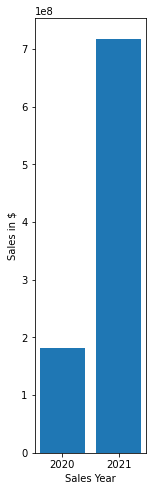

In [12]:
plt.figure(figsize=(2,8))
year_wise_sale= df.groupby(df['Selling Years'])['Total Sales'].sum()
year_un = df['Selling Years'].unique()
plt.bar(year_un, year_wise_sale)
plt.xlabel('Sales Year')
plt.ylabel('Sales in $')

As we can see as the pandemic wore off and the worldwide lockdowns were lifted, a sudden increase in sales can be seen. But to dig further we are going to take a deep look around the products criteria which were sold the most.

<AxesSubplot:xlabel='Product Category', ylabel='Total Sales'>

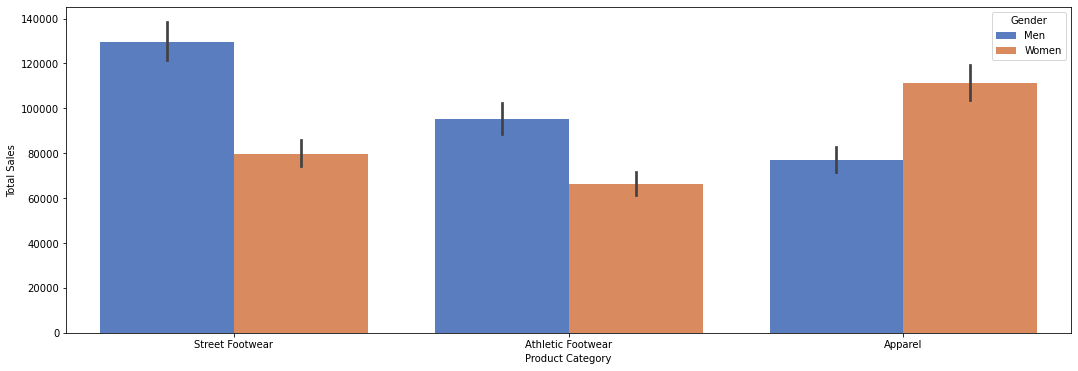

In [13]:
sns.barplot(x=df['Product Category'], y=df['Total Sales'], hue=df['Gender'], palette='muted')

As we can see Men are more inclined towards Street Footwear, while on the other hand, Women are  active in the Apparel's criteria.

### Let's look for some buying patterns 

Text(0.5, 1.0, 'Sales in Weekday vs Weekend')

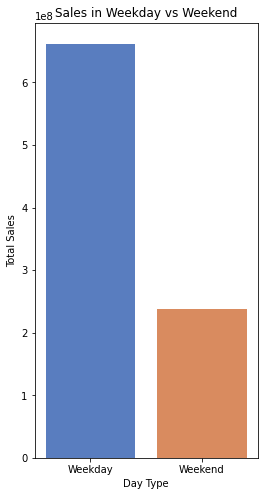

In [14]:
plt.figure(figsize=(4,8))
day_group = df.groupby(df['Day Type'])['Total Sales'].sum()
day_ty= df.groupby(df['Day Type']).sum().index
sns.barplot(day_ty,day_group, palette='muted')
plt.title("Sales in Weekday vs Weekend")

As we can see most of the sales were made on the Weekday, let's have a look by the means of the transactions.

Text(0.5, 1.0, 'Purchasing Medium vs Total Sales')

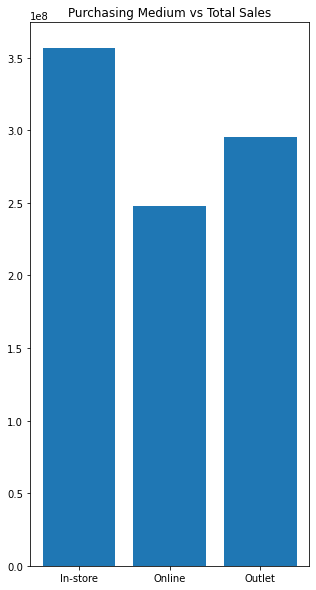

In [15]:
plt.figure(figsize=(5,10))
trans_ty= df.groupby(df['Sales Method'])['Total Sales'].sum()
trans_un = df.groupby(df['Sales Method']).sum().index
plt.bar(trans_un, trans_ty)
plt.title("Purchasing Medium vs Total Sales")

Text(0.5, 1.0, 'Net Profit Margins in Different Product Category')

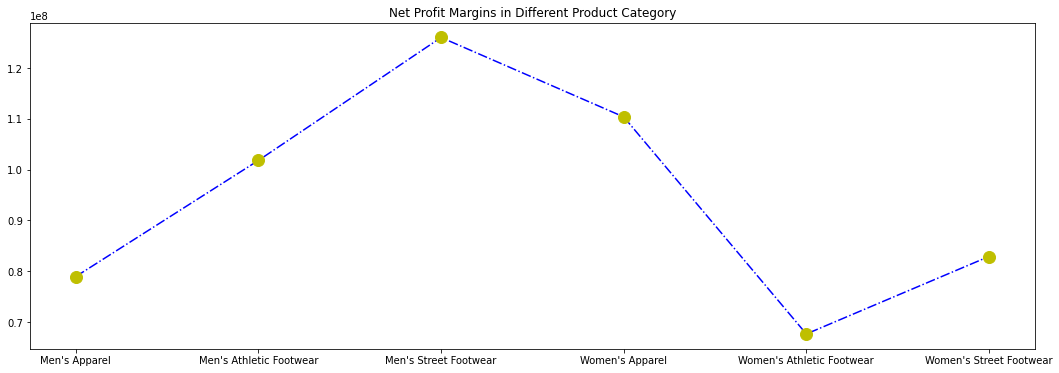

In [17]:
net_pro= df.groupby(df['Product'])['Net Profit Margin'].sum()
product_un= df.groupby(df['Product']).sum().index
plt.plot(product_un, net_pro, color='blue', ls='-.', marker='o', markersize=12, markerfacecolor='y', markeredgecolor='y')
plt.title('Net Profit Margins in Different Product Category')

We can see that Men's Street Footwear has the highest Profit Margin. But it was obvious as this product was the most sold product 
of Adidas, and next to this is Women's Apparel which is the second highest profitable product for the company.

## Now let's look at the total units sold by the Retailers 

Text(0.5, 1.0, 'Retailers and Their Units Sold')

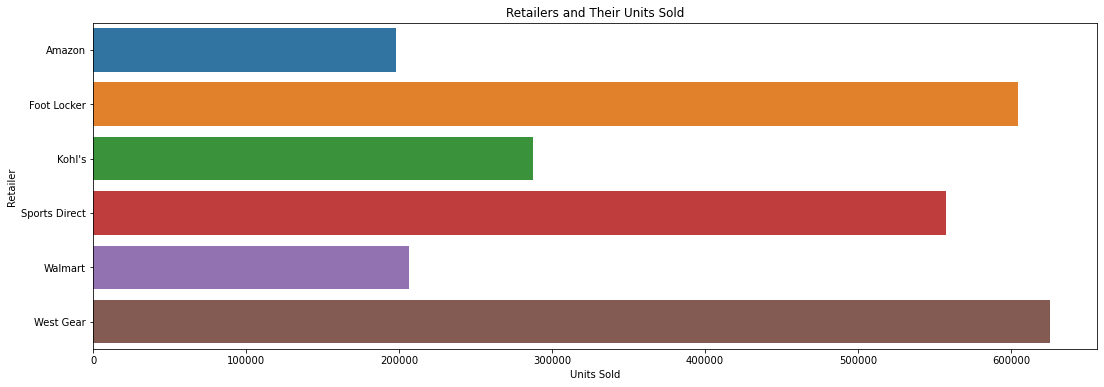

In [18]:
retailer_tc= df.groupby(df['Retailer'])['Units Sold'].sum()
retailer_un= df.groupby(df['Retailer']).sum().index

sns.barplot(retailer_tc,retailer_un)
plt.title("Retailers and Their Units Sold")

We can see in the above chart that "Foot Locker" and "West Gear" are our top sellers and after these two "Kohl's" and "Sports Direct" have maintained their sellings during 2020-2021.

### Now let's have a look at our top-selling states

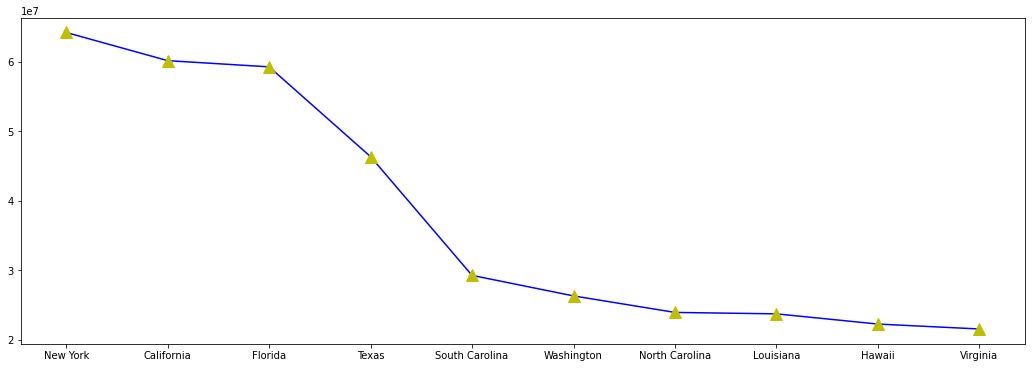

In [19]:
state_tc= (df.groupby(df['State'])['Total Sales'].sum())
state_tc= state_tc.sort_values(ascending=False).nlargest(10)

plt.plot(state_tc,marker='^',color='blue', markersize=12, markerfacecolor='y', markeredgecolor='y')

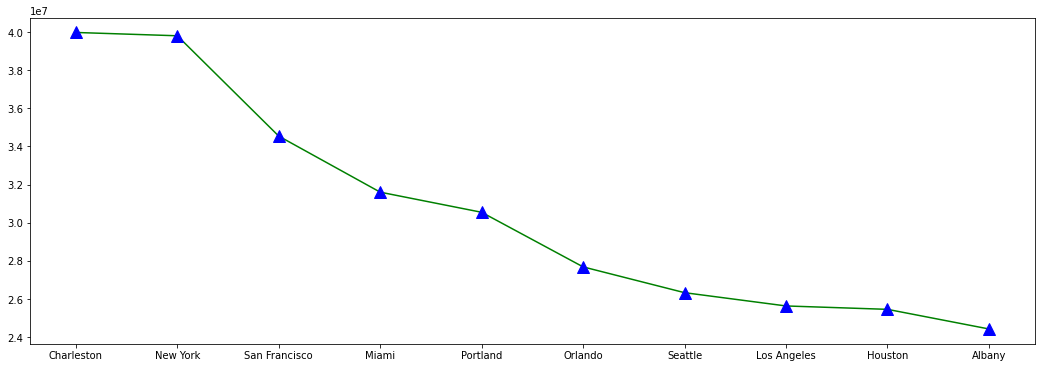

In [20]:
cities_tc= (df.groupby(df['City'])['Total Sales'].sum())
cities_tc= cities_tc.sort_values(ascending=False).nlargest(10)

plt.plot(cities_tc,marker='^',color='g', markersize=12, markerfacecolor='b', markeredgecolor='b')

## Summary:-

1. Men are the major heat zones contributors in the customer niche, whereas women are not that behind.
2. Where men dominated the sales in "Street Footwear", the women were the major contributors to "Apparel" sales.
3. Despite the gender, most of the customers preferred to buy the merchandise from a store or from an outlet.
        Online E-Commerce business is a good way to reach the majority of the population, and company must focus on the genuine 
Product availability on the online platforms with a wide range of products.
4. South Carolina, Washington, and North Carolina could be the potential marketplace for the coming days5. Amazon and Walmart could be the potential place for future sales. 